###**Business goal**

Classify businesses "successiblity" and ability to continue functioning. We can sell the data to bigger corporations/individuals who are planning to invest in the region, specific countries or businesses.

For example, we will say what is the predicted business time of existence + profitability over the time (how much time it will continue providing their services, and their profitability)

* potential problem (question) - we don't have data for profitability and times of business existence - can we predict them without having them?

Another goal suggestion (paraphrasing?) - you're opening a spot, and you want to know how successful it's going to be. It's predicted "successibility" should be classified

### Analysis

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [12]:
# df = pd.read_csv('/content/google_places_data.csv')
df = pd.read_csv('google_places_data.csv')

train_df, test1_df = train_test_split(df, test_size=0.3, random_state=42)

test_df, val_df= train_test_split(test1_df, test_size=0.4, random_state=42)

In [17]:
pd.set_option('display.max_columns', None)
df.head(3)

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,place_id,place_link,types,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,city,verified,state,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening,Monday_morning,Monday_afternoon,Monday_evening,Tuesday_morning,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,ChIJBcspVtZRZz4RjADHrd23yyc,https://www.google.com/maps/place/data=!3m1!4b...,Museum,2-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,10 AM-6 PM,Abu Dhabi,False,Open ⋅ Closes 6 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,ChIJNfA6SWFdZz4Rt77o-SQP8qQ,https://www.google.com/maps/place/data=!3m1!4b...,Museum,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Open 24 hours,Abu Dhabi,False,Open 24 hours,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,ChIJM03GGgT3kT4Rkzu2FK_FIGE,https://www.google.com/maps/place/data=!3m1!4b...,"National museum, Museum, Tourist attraction",2-6 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,10 AM-5 PM,Muscat,True,Open ⋅ Closes 5 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,Oman


In [40]:
df11 = df[['rating','geo_cluster']]
average_values_mean = df11.groupby('geo_cluster').mean()
average_values_median = df11.groupby('geo_cluster').median()

print("Mean avg ranking", average_values_mean, end = "\n\n")
print("Median avg ranking", average_values_median)

Mean avg ranking                rating
geo_cluster          
0.0          4.266600
1.0          4.418067
2.0          4.280892
3.0          4.347870
4.0          4.240777

Median avg ranking              rating
geo_cluster        
0.0             4.4
1.0             4.5
2.0             4.4
3.0             4.4
4.0             4.4


Observation: geo_cluster 1 has the best ranking score in both - East America

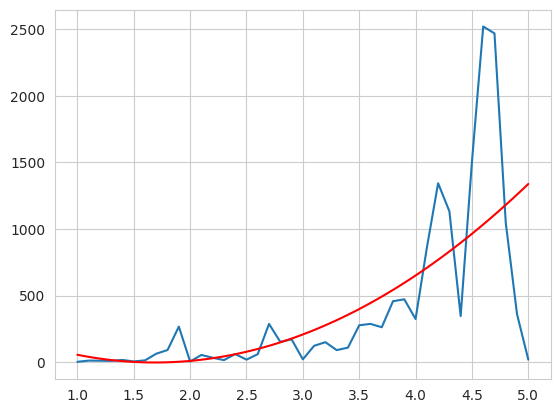

In [39]:
df11 = df[['rating','review_count']]
average_values_mean = df11.groupby('rating').mean()

z = np.polyfit(x=average_values_mean.index, y=average_values_mean['review_count'], deg=2)
p = np.poly1d(z)

x_trendline = np.linspace(average_values_mean.index.min(), average_values_mean.index.max(), 100)
y_trendline = p(x_trendline)

plt.plot(average_values_mean,label='Rating vs Review count')
plt.plot(x_trendline, y_trendline, color='red', label='Trendline')
plt.show()


Observation: The more reviews are given, the higher the rating is (exept 5.0 - extreme case, it's almost impossible)

In [57]:
df44 = df[['rating','website']]
df44.loc[df44['website'] != 'Unknown', 'website'] = 'Known'

average_values_mean = df44.groupby('website').mean()
average_values_mean

,rating
website,
Known,4.318408
Unknown,4.243095


* Businesses without a website have a bit lower rating

> Add blockquote

